In [1]:
# Libraries Import
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Cotton Disease/train'
valid_path = 'Cotton Disease/test'

In [3]:
!unzip "/content/drive/MyDrive/Cotton Disease.zip"

Archive:  /content/drive/MyDrive/Cotton Disease.zip
   creating: Cotton Disease/test/
   creating: Cotton Disease/test/diseased cotton leaf/
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (183)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (193)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (194)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (204)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (206)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (214)_iaip.jpg  
  inflating: Cotton Disease/test/diseased cotton leaf/dis_leaf (

In [4]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [5]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Cotton Disease/train/*')

In [7]:
folders

['Cotton Disease/train/fresh cotton leaf',
 'Cotton Disease/train/diseased cotton leaf',
 'Cotton Disease/train/fresh cotton plant',
 'Cotton Disease/train/diseased cotton plant']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [9]:
len(folders)

4

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
61/61 [==============================] - 52s 691ms/step - loss: 0.6256 - accuracy: 0.7606 - val_loss: 0.2487 - val_accuracy: 0.9151
Epoch 2/20
61/61 [==============================] - 36s 591ms/step - loss: 0.2363 - accuracy: 0.9113 - val_loss: 0.1716 - val_accuracy: 0.9434
Epoch 3/20
61/61 [==============================] - 36s 589ms/step - loss: 0.1830 - accuracy: 0.9380 - val_loss: 0.2288 - val_accuracy: 0.8962
Epoch 4/20
61/61 [==============================] - 36s 598ms/step - loss: 0.1611 - accuracy: 0.9431 - val_loss: 0.1608 - val_accuracy: 0.9434
Epoch 5/20
61/61 [==============================] - 34s 561ms/step - loss: 0.1220 - accuracy: 0.9554 - val_loss: 0.1072 - val_accuracy: 0.9623
Epoch 6/20
61/61 [==============================] - 34s 562ms/step - loss: 0.0901 - accuracy: 0.9718 - val_loss: 0.1449 - val_accuracy: 0.9434
Epoch 7/20
61/61 [==============================] - 36s 583ms/step - loss: 0.0759 - accuracy: 0.9780 - val_loss: 0.1191 - val_accuracy: 0.9528

In [31]:
r.history

{'loss': [0.6256072521209717,
  0.23631662130355835,
  0.1830352395772934,
  0.16114777326583862,
  0.12196193635463715,
  0.09009938687086105,
  0.07587254792451859,
  0.08284050971269608,
  0.052431248128414154,
  0.053050462156534195,
  0.04350459948182106,
  0.043914299458265305,
  0.03712521120905876,
  0.041735801845788956,
  0.034111589193344116,
  0.04152849316596985,
  0.030145937576889992,
  0.023275814950466156,
  0.025387436151504517,
  0.021886460483074188],
 'accuracy': [0.7606355547904968,
  0.9113275408744812,
  0.9379805326461792,
  0.9431061148643494,
  0.9554075002670288,
  0.9718093276023865,
  0.9779600501060486,
  0.9728344678878784,
  0.9835981726646423,
  0.9841107130050659,
  0.9882111549377441,
  0.9897488355636597,
  0.9912865161895752,
  0.9887237548828125,
  0.9912865161895752,
  0.986160933971405,
  0.9943618774414062,
  0.9953869581222534,
  0.9948744177818298,
  0.9974372386932373],
 'val_loss': [0.24865300953388214,
  0.17162783443927765,
  0.2287570238

In [26]:
import matplotlib.pyplot as plt

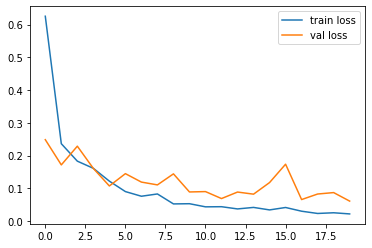

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

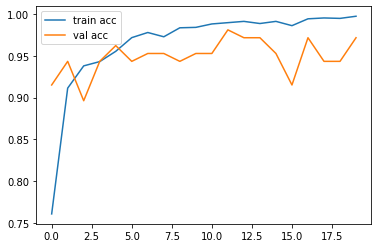

<Figure size 432x288 with 0 Axes>

In [30]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')